## Jupyter Notebook: Topology Plots

This notebook will explore topology plots.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
np.random.seed(1987)

In [35]:
# Generate random 3D-distributed points
def contour_plot(df, x, y):
    """
    Generates a smooth 2D density contour plot (topological map).
    
    Parameters:
        x (array-like): X-coordinates of the data points.
        y (array-like): Y-coordinates of the data points.
    """
    # Create the figure
    plt.figure(figsize=(8, 6))

    # Use Seaborn's kdeplot with explicit x= and y= arguments
    sns.kdeplot(data=df, x=x, y=y, levels=20, cmap="coolwarm", fill=True)
    sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
    
    # Add labels and styling
    plt.title("Topological Density Plot (Contour Map)", fontsize=14, fontweight="bold")
    plt.xlabel("X Axis", fontsize=12)
    plt.ylabel("Y Axis", fontsize=12)

    # Show the plot
    plt.show()

In [46]:
def enhanced_contour_plot(*dfs, levels=20, K=None, dotted_color="white", color_palette=None, 
                           show_marginals=False, marginal_alpha=0.5, marginal_color="black"):
    """
    Generates a smooth 2D density contour plot (topological map) with advanced styling.

    Parameters:
        *dfs (DataFrames): One or multiple Pandas DataFrames containing 'x' and 'y' columns.
        levels (int): Number of contour levels.
        K (float, optional): Draw dotted contours every K intervals.
        dotted_color (str): Color of dotted contour lines ('white' or 'black').
        color_palette (str, optional): Seaborn colormap (default is a colorblind-friendly palette).
        show_marginals (bool): Whether to show marginal distributions on X and Y axes.
        marginal_alpha (float): Transparency of marginal distributions.
        marginal_color (str): Color of the marginal distribution edges.
    """
    
    # Default colorblind-friendly palette if not provided
    if color_palette is None:
        color_palette = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)

    # Set up the figure with optional marginal plots
    if show_marginals:
        fig, ax = plt.subplots(figsize=(12, 10))
        grid = sns.jointplot(x=[], y=[], kind="scatter", height=8, marginal_ticks=True)
        ax = grid.ax_joint
    else:
        fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot each dataset with a different color
    for df in dfs:
        sns.kdeplot(data=df, x=df["x"], y=df["y"], levels=levels, cmap=color_palette, fill=True, ax=ax)

        # Add main contour lines (solid)
        contour = sns.kdeplot(data=df, x=df["x"], y=df["y"], levels=levels, colors="black", linewidths=1, ax=ax)
        
        # Add dotted contour lines for every K increase
        if K:
            contour_lines = np.linspace(df["x"].min(), df["x"].max(), levels)
            for level in contour_lines:
                if level % K == 0:
                    ax.contour(df["x"], df["y"], np.random.randn(*df["x"].shape), 
                               levels=[level], colors=dotted_color, linestyles="dotted")

    # Add colorbar (legend)
    norm = plt.Normalize(vmin=0, vmax=levels)
    sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))

    # Add marginal distributions
    if show_marginals:
        for df in dfs:
            sns.kdeplot(data=df, x="x", ax=grid.ax_marg_x, color=marginal_color, fill=True, alpha=marginal_alpha)
            sns.kdeplot(data=df, y="y", ax=grid.ax_marg_y, color=marginal_color, fill=True, alpha=marginal_alpha)
    
    # Titles and labels
    ax.set_title("", fontsize=14, fontweight="bold")
    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel("", fontsize=12)

    plt.show()

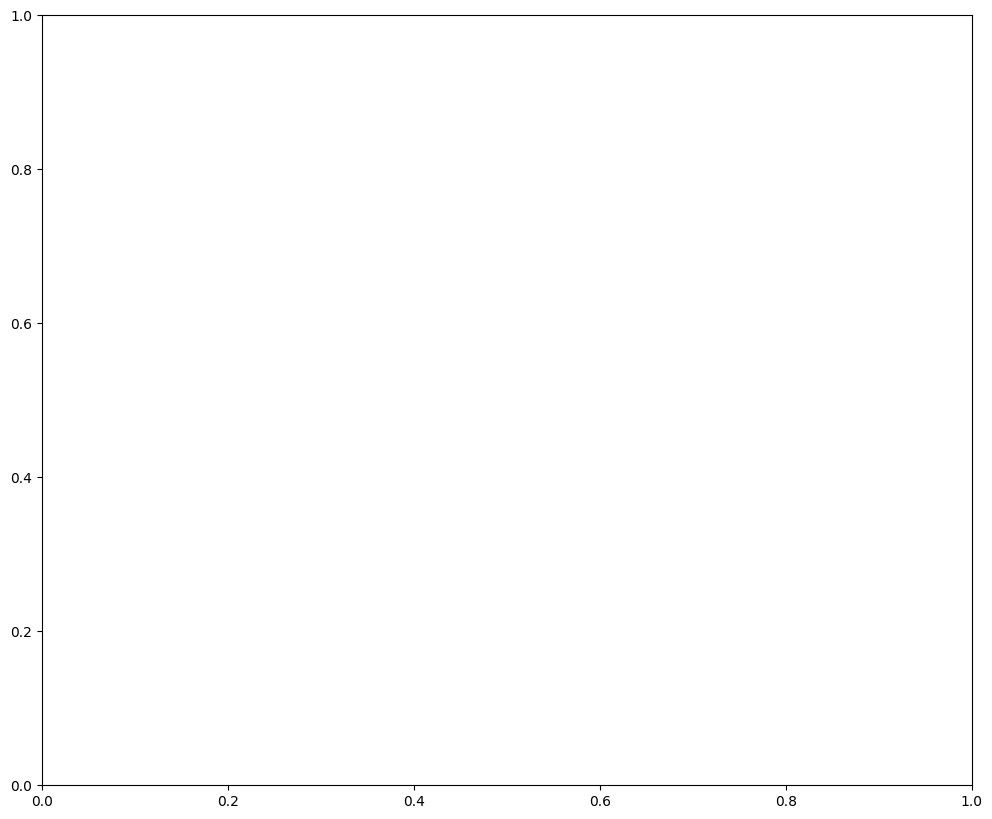

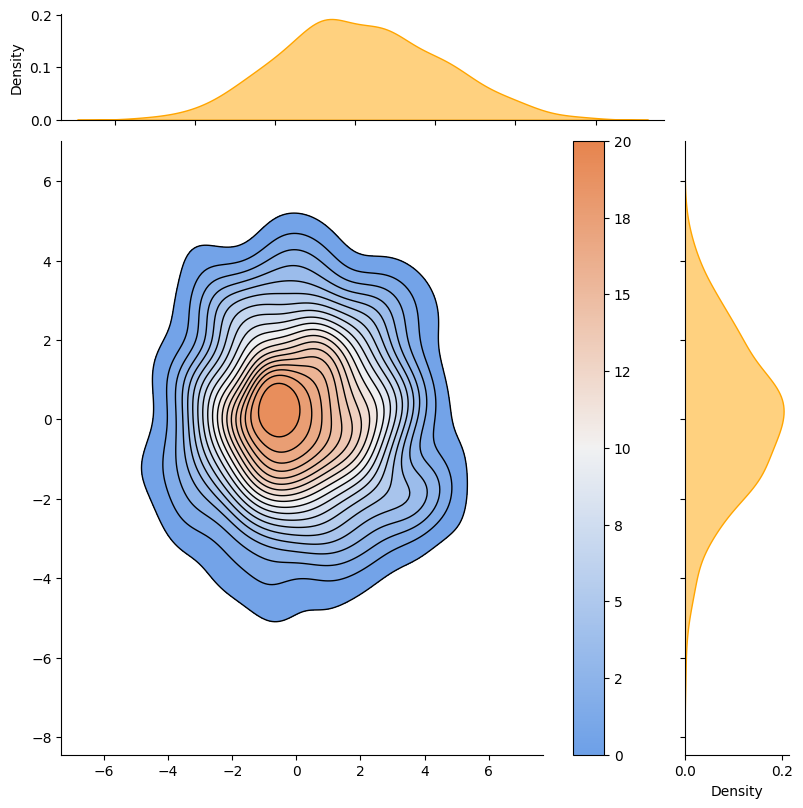

In [50]:

# 1. Normal Distribution
df_normal = pd.DataFrame({
    "x": np.random.normal(loc=0, scale=2, size=500),
    "y": np.random.normal(loc=0, scale=2, size=500)
})

# 2. Uniform Distribution
df_uniform = pd.DataFrame({
    "x": np.random.uniform(-5, 5, size=500),
    "y": np.random.uniform(-5, 5, size=500)
})

# 3. Bimodal Distribution
df_bimodal = pd.DataFrame({
    "x": np.concatenate([np.random.normal(-3, 1, 250), np.random.normal(3, 1, 250)]),
    "y": np.concatenate([np.random.normal(-3, 1, 250), np.random.normal(3, 1, 250)])
})

# 4. Exponential Distribution
df_exponential = pd.DataFrame({
    "x": np.random.exponential(scale=2, size=500),
    "y": np.random.exponential(scale=2, size=500)
})

# 5. Circular Distribution (for testing contour shapes)
theta = np.linspace(0, 2*np.pi, 500)
df_circular = pd.DataFrame({
    "x": 5 * np.cos(theta) + np.random.normal(scale=0.5, size=500),
    "y": 5 * np.sin(theta) + np.random.normal(scale=0.5, size=500)
})

# List of all distributions
distributions = [df_normal, df_uniform, df_bimodal, df_exponential, df_circular]


enhanced_contour_plot(df_normal, levels=20, K=None, dotted_color="white", color_palette=None, 
                      show_marginals=True, marginal_alpha=0.5, marginal_color="orange")